## IMPORT NECESSARY LIBRARIES & COLLECT DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Collecting 4 weeks of Turnstile Data
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220226.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220219.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220212.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220205.txt')

mta = pd.concat([df1, df2, df3, df4])

##  DATA EXPLORATION, CLEANING & PREPARATION

In [3]:
mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,23:00:00,REGULAR,7688248,2668835
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,03:00:00,REGULAR,7688264,2668840
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,07:00:00,REGULAR,7688269,2668844
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,11:00:00,REGULAR,7688284,2668911
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,15:00:00,REGULAR,7688320,2668966


In [4]:
mta.shape

(840554, 11)

In [5]:
# Check if there are any duplicates in the complete dataset
mta.duplicated(keep='first').sum()

0

In [6]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840554 entries, 0 to 210082
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   840554 non-null  object
 1   UNIT                                                                  840554 non-null  object
 2   SCP                                                                   840554 non-null  object
 3   STATION                                                               840554 non-null  object
 4   LINENAME                                                              840554 non-null  object
 5   DIVISION                                                              840554 non-null  object
 6   DATE                                                                  840554 non-null  objec

In [7]:
# Eliminate spaces in the columns
print(mta.columns)
mta.columns = mta.columns.str.strip()
print(mta.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


In [8]:
# Check if there are any null values in the Dataset
mta.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [9]:
# Concat DATE and TIME fields then change format to datetime
# Create DAY column to calculate daily turnstile traffic

mta['DATE_TIME'] = pd.to_datetime((mta['DATE']+" "+mta['TIME']),format="%m/%d/%Y %H:%M:%S")
mta['DAY'] = mta['DATE_TIME'].dt.day_name()

In [10]:
mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,03:00:00,REGULAR,7688079,2668548,2022-02-19 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,07:00:00,REGULAR,7688081,2668566,2022-02-19 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,11:00:00,REGULAR,7688102,2668666,2022-02-19 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,15:00:00,REGULAR,7688138,2668749,2022-02-19 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,19:00:00,REGULAR,7688207,2668805,2022-02-19 19:00:00,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2022,23:00:00,REGULAR,7688248,2668835,2022-02-19 23:00:00,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,03:00:00,REGULAR,7688264,2668840,2022-02-20 03:00:00,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,07:00:00,REGULAR,7688269,2668844,2022-02-20 07:00:00,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,11:00:00,REGULAR,7688284,2668911,2022-02-20 11:00:00,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2022,15:00:00,REGULAR,7688320,2668966,2022-02-20 15:00:00,Sunday


In [11]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840554 entries, 0 to 210082
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   C/A        840554 non-null  object        
 1   UNIT       840554 non-null  object        
 2   SCP        840554 non-null  object        
 3   STATION    840554 non-null  object        
 4   LINENAME   840554 non-null  object        
 5   DIVISION   840554 non-null  object        
 6   DATE       840554 non-null  object        
 7   TIME       840554 non-null  object        
 8   DESC       840554 non-null  object        
 9   ENTRIES    840554 non-null  int64         
 10  EXITS      840554 non-null  int64         
 11  DATE_TIME  840554 non-null  datetime64[ns]
 12  DAY        840554 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 89.8+ MB


In [12]:
mta['STATION'].nunique()

378

In [13]:
mta['STATION'].value_counts().sort_values(ascending=False).head(10)

34 ST-PENN STA     16941
FULTON ST          16120
GRD CNTRL-42 ST    15734
23 ST              12273
86 ST              10923
CANAL ST            9758
59 ST               9458
CHAMBERS ST         9291
34 ST-HERALD SQ     8932
ATL AV-BARCLAY      8604
Name: STATION, dtype: int64

In [14]:
mta_unique = mta.groupby(['UNIT','SCP'])[['STATION','DATE_TIME','ENTRIES','EXITS']].nunique()
print("*** Yapılan gruplamaya göre Unique olmayan istasyon sayısı:", mta_unique[mta_unique.STATION != 1]['STATION'].sum())
print("*** Dolayısıyla UNIT ve SCP alanlarının birleşimi bize unique olarak turnike bilgisini vermektedir")
print("\n",mta_unique)

*** Yapılan gruplamaya göre Unique olmayan istasyon sayısı: 0
*** Dolayısıyla UNIT ve SCP alanlarının birleşimi bize unique olarak turnike bilgisini vermektedir

                STATION  DATE_TIME  ENTRIES  EXITS
UNIT SCP                                         
R001 00-00-00        1        168      168    168
     00-00-01        1        168      168    168
     00-00-02        1        168      168    168
     00-00-03        1        168      160    164
     00-00-04        1        168      163    168
...                ...        ...      ...    ...
R572 01-03-00        1        168       51    168
     01-03-01        1        167      155    167
     01-03-02        1        168      150    168
     01-03-03        1        167      157    167
     01-03-04        1        168      167    168

[5026 rows x 4 columns]


In [15]:
# Check min and max ENTRIES, EXITS values for data understanding
mta.groupby(['STATION','UNIT','SCP','DAY'])['ENTRIES','EXITS'].agg(['max','min'])

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_5936/2992832673.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta.groupby(['STATION','UNIT','SCP','DAY'])['ENTRIES','EXITS'].agg(['max','min'])


ENTRIES               EXITS          
                                        max       min       max       min
STATION   UNIT SCP      DAY                                              
1 AV      R248 00-00-00 Friday     15727939  15715744  18465334  18411206
                        Monday     15725811  15713196  18455514  18401432
                        Saturday   15725158  15712640  18451697  18398906
                        Sunday     15725478  15712896  18453563  18400094
                        Thursday   15727386  15714946  18462749  18408474
...                                     ...       ...       ...       ...
ZEREGA AV R326 00-05-01 Saturday         39        39       267       267
                        Sunday           39        39       267       267
                        Thursday         39        39       267       267
                        Tuesday          39        39       267       267
                        Wednesday        39        39       267       267

[35142 rows x 4 columns]

In [16]:
# Function to get the unique DAY + DATE combination
def get_day(x):
    return f"{x.date()}_{x.day_name()}"

In [17]:
mta['DAY_DATE'] = mta['DATE_TIME'].apply(get_day)

In [18]:
mta_grouped = mta.groupby(['STATION','UNIT','SCP','DAY','DAY_DATE'])['ENTRIES','EXITS'].agg(['max','min'])
mta_grouped.sort_values(('ENTRIES','max'),ascending=False).reset_index()

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_5936/561694248.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_grouped = mta.groupby(['STATION','UNIT','SCP','DAY','DAY_DATE'])['ENTRIES','EXITS'].agg(['max','min'])


STATION  UNIT       SCP        DAY              DAY_DATE  \
                                                                          
0             HEWES ST  R352  00-00-00   Saturday   2022-01-29_Saturday   
1             HEWES ST  R352  00-00-00     Sunday     2022-01-30_Sunday   
2             HEWES ST  R352  00-00-00     Monday     2022-01-31_Monday   
3             HEWES ST  R352  00-00-00    Tuesday    2022-02-01_Tuesday   
4             HEWES ST  R352  00-00-00  Wednesday  2022-02-02_Wednesday   
...                ...   ...       ...        ...                   ...   
140334      OCEAN PKWY  R264  01-05-01   Saturday   2022-01-29_Saturday   
140335      OCEAN PKWY  R264  01-05-01   Saturday   2022-02-05_Saturday   
140336      OCEAN PKWY  R264  01-05-01   Saturday   2022-02-12_Saturday   
140337      OCEAN PKWY  R264  01-05-01   Saturday   2022-02-19_Saturday   
140338  JAMAICA CENTER  R025  00-05-01  Wednesday  2022-02-23_Wednesday   

           ENTRIES                  EXITS             
               max         min        max        min  
0       2147329005  2147328893  671202895  671202803  
1       2147328883  2147328741  671202982  671202904  
2       2147328718  2147328388  671203184  671202999  
3       2147328361  2147328000  671203398  671203217  
4       2147327975  2147327577  671203627  671203422  
...            ...         ...        ...        ...  
140334           0           0        919        919  
140335           0           0        920        920  
140336           0           0        922        922  
140337           0           0        923        923  
140338           0           0       1555       1555  

[140339 rows x 9 columns]

In [19]:
#mta[(mta['DAY_DATE']=="2022-01-29_Saturday") & (mta['UNIT'] == 'R469')].groupby(['SCP'])['SCP'].value_counts()

In [20]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['STATION','UNIT','SCP','DAY_DATE','DAY']).ENTRIES.max() - mta.groupby(['STATION','UNIT','SCP','DAY_DATE','DAY']).ENTRIES.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['STATION','UNIT','SCP','DAY_DATE','DAY']).EXITS.max() - mta.groupby(['STATION','UNIT','SCP','DAY_DATE','DAY']).EXITS.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['STATION','UNIT','SCP','DAY_DATE','DAY'])
mta_entry_exit.isnull().sum()

mta_entry_exit.columns = ['STATION','UNIT','SCP','DAY_DATE','DAY','ENTRIES_DIFF','EXITS_DIFF']
mta_entry_exit

,STATION,UNIT,SCP,DAY_DATE,DAY,ENTRIES_DIFF,EXITS_DIFF
0,1 AV,R248,00-00-00,2022-01-29_Saturday,Saturday,237,1062
1,1 AV,R248,00-00-00,2022-01-30_Sunday,Sunday,282,1285
2,1 AV,R248,00-00-00,2022-01-31_Monday,Monday,512,2026
3,1 AV,R248,00-00-00,2022-02-01_Tuesday,Tuesday,455,2202
4,1 AV,R248,00-00-00,2022-02-02_Wednesday,Wednesday,723,2588
...,...,...,...,...,...,...,...
140334,ZEREGA AV,R326,00-05-01,2022-02-21_Monday,Monday,0,0
140335,ZEREGA AV,R326,00-05-01,2022-02-22_Tuesday,Tuesday,0,0
140336,ZEREGA AV,R326,00-05-01,2022-02-23_Wednesday,Wednesday,0,0
140337,ZEREGA AV,R326,00-05-01,2022-02-24_Thursday,Thursday,0,0


In [21]:
mta_entry_exit['TRAFFIC'] = mta_entry_exit['ENTRIES_DIFF'] + mta_entry_exit['EXITS_DIFF']

In [22]:
mta_entry_exit.sort_values('TRAFFIC',ascending=False).head(30)

,STATION,UNIT,SCP,DAY_DATE,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
99509,JACKSON AV,R405,00-00-02,2022-02-07_Monday,Monday,1520745531,116946157,1637691688
64592,BOWLING GREEN,R041,01-05-00,2022-02-16_Wednesday,Wednesday,1289819893,152764416,1442584309
104583,KEW GARDENS,R158,00-03-02,2022-02-22_Tuesday,Tuesday,5808634,2097768,7906402
135092,W 8 ST-AQUARIUM,R312,00-00-02,2022-02-13_Sunday,Sunday,3622300,1838526,5460826
39652,59 ST COLUMBUS,R084,00-06-00,2022-01-29_Saturday,Saturday,575025,780162,1355187
130695,THIRTY ST,R541,00-04-08,2022-02-17_Thursday,Thursday,888961,145352,1034313
82656,EXCHANGE PLACE,R543,00-00-05,2022-02-10_Thursday,Thursday,435384,567356,1002740
135012,W 4 ST-WASH SQ,R138,01-06-01,2022-02-17_Thursday,Thursday,549048,296815,845863
89803,FULTON ST,R028,01-04-00,2022-02-25_Friday,Friday,308386,401837,710223
8687,14TH STREET,R545,00-00-00,2022-01-30_Sunday,Sunday,379441,305140,684581


## DETECTING & TREATING OUTLIERS

In [23]:
mta_entry_exit['TRAFFIC'].describe()

count    1.403390e+05
mean     2.293735e+04
std      5.825828e+06
min      0.000000e+00
25%      2.230000e+02
50%      6.120000e+02
75%      1.176000e+03
max      1.637692e+09
Name: TRAFFIC, dtype: float64

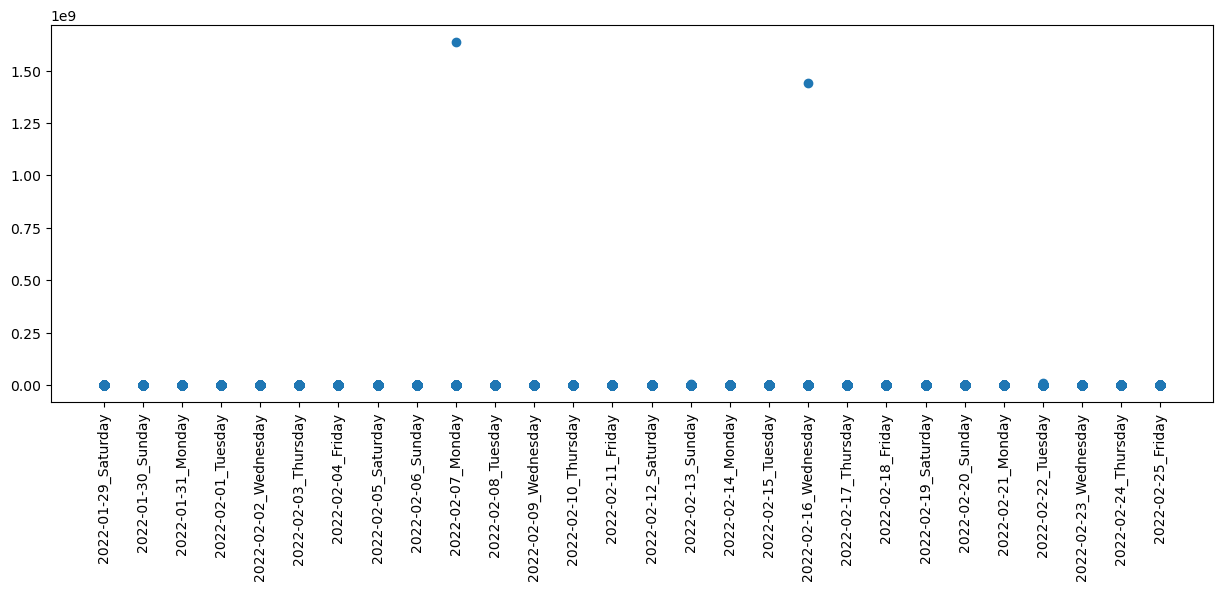

In [24]:
#sns.set(rc={"figure.figsize":(16, 8)})
# plt.figure(figsize=(8,4),dpi=150)
# ax = sns.scatterplot(x='DAY_DATE',y='TRAFFIC',data=mta_entry_exit, s=50)
# plt.xlabel("DAY",fontsize=10,fontweight="bold")
# plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
# plt.xticks("")
# plt.show()
plt.figure(figsize=[15,5], dpi=100)
plt.xticks(rotation=90)
plt.scatter(mta_entry_exit['DAY_DATE'],mta_entry_exit['TRAFFIC'])
plt.show()

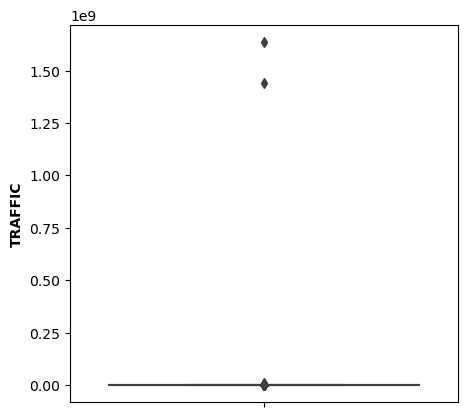

In [25]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [26]:
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] > 10000].index, inplace=True)
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] == 0].index, inplace=True)


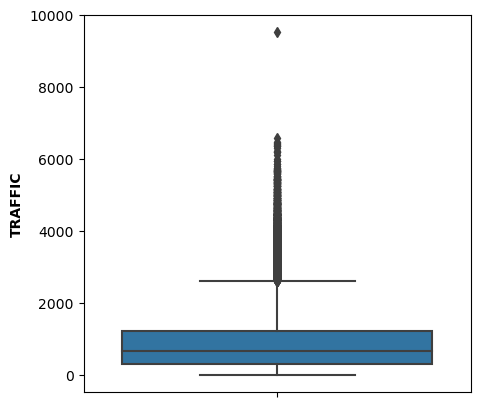

In [27]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [28]:
mta_entry_exit['TRAFFIC'].quantile(0.9)

1882.0

In [29]:
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] > 1882].index, inplace=True)

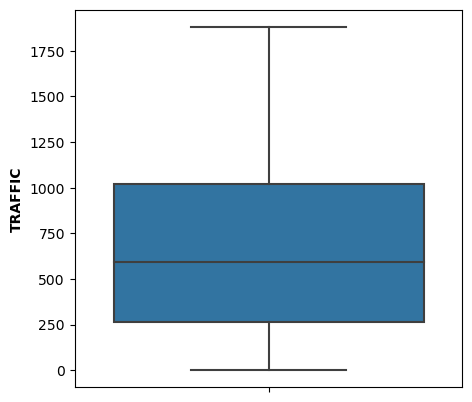

In [30]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [31]:
#plt.figure(figsize=[15,5], dpi=100)
#ax = sns.scatterplot(x='DAY_DATE',y='TRAFFIC',data=mta_entry_exit)
#plt.xlabel("DAY",fontsize=10,fontweight="bold")
#plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
#plt.xticks(rotation=90)
#plt.show()

In [32]:
mta_top_10 = mta_entry_exit.groupby('STATION').sum().sort_values('TRAFFIC', ascending=False).head(10)
mta_top_10 = mta_top_10.reset_index()
print(mta_top_10)   

           STATION  ENTRIES_DIFF  EXITS_DIFF  TRAFFIC
0   34 ST-PENN STA        810790     1093441  1904231
1        FULTON ST        614471      834161  1448632
2            23 ST        656508      780562  1437070
3  GRD CNTRL-42 ST        520956      692282  1213238
4            59 ST        474750      638693  1113443
5   TIMES SQ-42 ST        460111      624260  1084371
6         CANAL ST        446720      628636  1075356
7            86 ST        532125      519272  1051397
8  34 ST-HERALD SQ        453441      591655  1045096
9            14 ST        362087      580119   942206


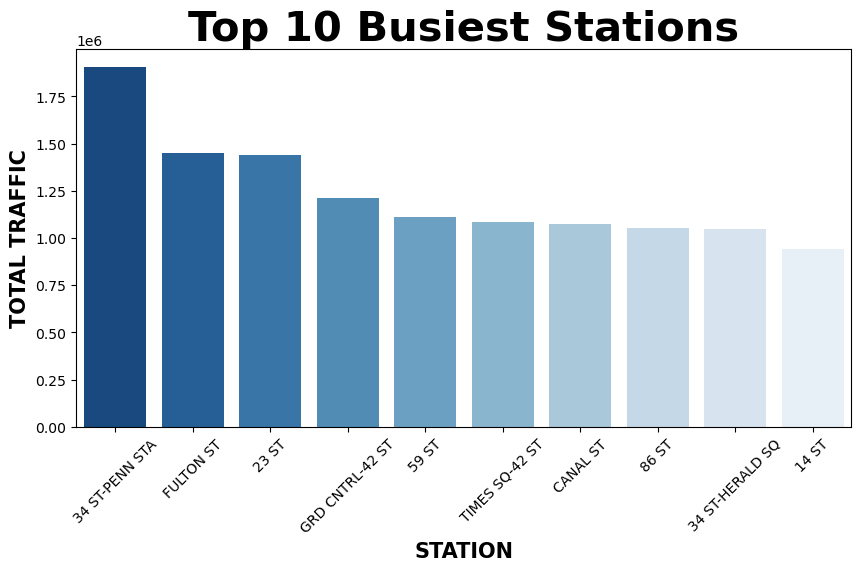

In [42]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',data = mta_top_10,palette=("Blues_r"))
plt.title('Top 10 Busiest Stations', weight="bold", fontsize=30)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('STATION',fontsize=15,fontweight="bold")
plt.xticks(rotation=45)
#ax.bar_label(ax.containers[0])
plt.show()

In [34]:
mta_top_days = mta_entry_exit.groupby(['DAY']).sum().sort_values(['TRAFFIC'], ascending=False)
mta_top_days = mta_top_days.reset_index()
mta_top_days

,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Thursday,6283477,6458286,12741763
1,Wednesday,6248622,6418230,12666852
2,Tuesday,6188015,6473157,12661172
3,Friday,6109990,6465358,12575348
4,Monday,5845572,6243729,12089301
5,Saturday,3800711,5043981,8844692
6,Sunday,3366992,4653040,8020032


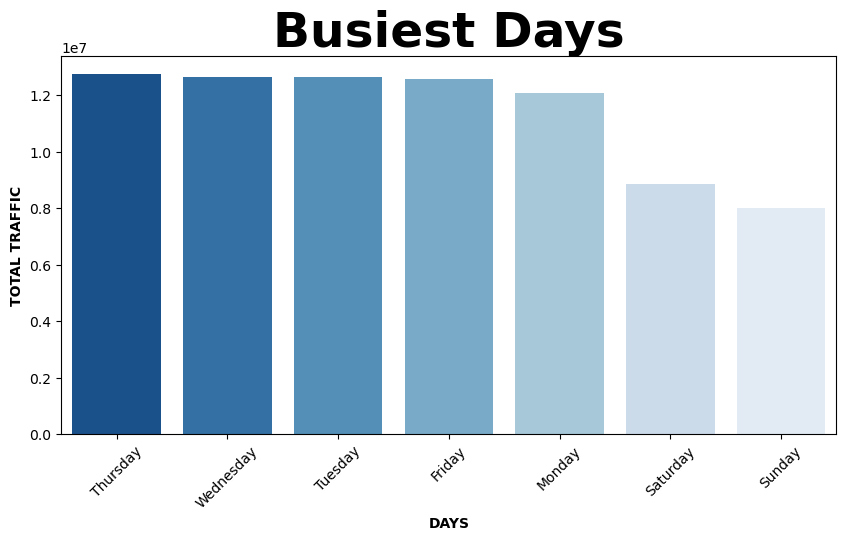

In [46]:
plt.figure(figsize=[10,5], dpi=100)
ax = sns.barplot(x = 'DAY',y = 'TRAFFIC',data = mta_top_days,palette=("Blues_r"))
plt.title('Busiest Days', weight="bold", fontsize=35)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('DAYS',fontsize=10,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

In [36]:
top_10_stations = [] 
for ind in mta_top_10.index:
    top_10_stations.append(mta_top_10['STATION'][ind])

In [37]:
mta_top_stations_by_day = mta_entry_exit[mta_entry_exit.STATION.isin(top_10_stations)]
mta_top_stations_by_day = mta_top_stations_by_day.groupby(['DAY','STATION']).sum().sort_values('TRAFFIC',ascending=False)
mta_top_stations_by_day = mta_top_stations_by_day.reset_index()

mta_top_stations_by_day

,DAY,STATION,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Tuesday,34 ST-PENN STA,144352,177034,321386
1,Thursday,34 ST-PENN STA,143356,176333,319689
2,Wednesday,34 ST-PENN STA,141061,174539,315600
3,Friday,34 ST-PENN STA,133818,176816,310634
4,Monday,34 ST-PENN STA,116878,150464,267342
...,...,...,...,...,...
65,Sunday,CANAL ST,45237,70176,115413
66,Saturday,14 ST,38104,73505,111609
67,Sunday,FULTON ST,41273,70129,111402
68,Sunday,59 ST,41350,64532,105882


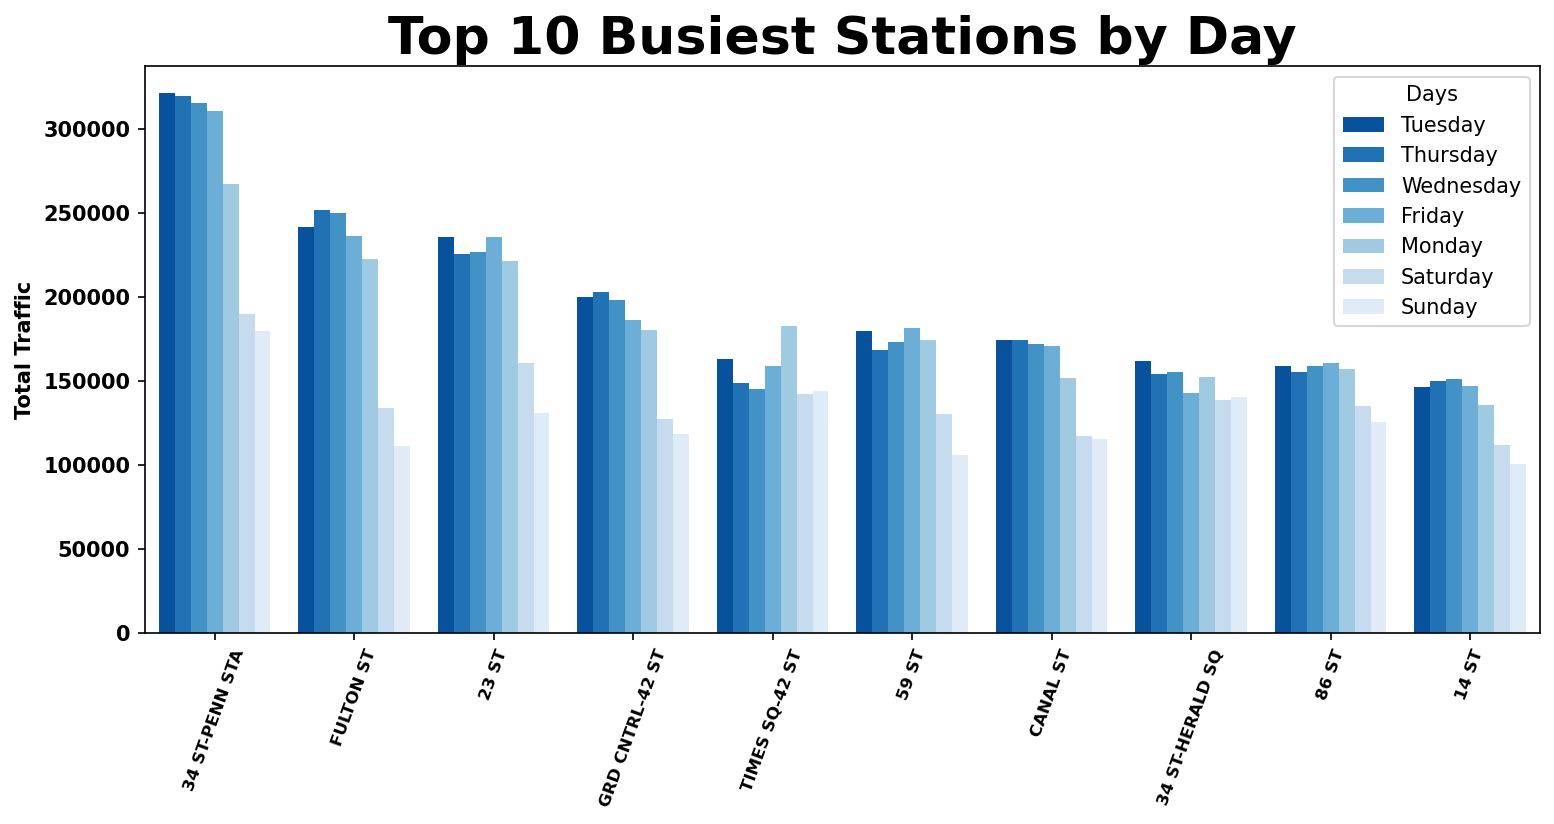

In [54]:
plt.figure(figsize=[12,5], dpi=150)
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="DAY",data=mta_top_stations_by_day, saturation=1,palette=("Blues_r"))
plt.title("Top 10 Busiest Stations by Day", weight="bold", fontsize=25)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=70, weight="bold",fontsize=8)
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()